#### **Week 7 Demo: Offline Policy Evaluation with Doubly Robust Estimation**

**Course:** Causal Machine Learning (GRAD-E1487), Fall 2025  
**Instructor:** Drew Dimmery  
**Date:** October 21, 2025  


#### I. Introduction & Motivation  
#### From Effect Estimation to Policy Evaluation  

What we've done so far in this course:

- Estimated treatment effects:  
  $$
  \tau = \mathbb{E}[Y(1) - Y(0)]
  $$

- Estimated conditional treatment effects:  
  $$
  \tau(x) = \mathbb{E}[Y(1) - Y(0) \mid X = x]
  $$

- **Goal:** Understand how large effects are (and for whom)



#### Today's shift:

- **Evaluate and learn policies (decision rules)**  
- A policy $\pi: \mathcal{X} \to \{0,1\}$ maps covariates to treatment assignments  
- **Policy value:**  
  $$
  V(\pi) = \mathbb{E}[Y(\pi(X))]
  $$
  expected outcome if we follow $\pi$  
- **Goal:** Find policies that produce good outcomes, not just estimate effects


#### Why This Matters

- Decision-making requires choosing who gets treated (not just knowing effect sizes)  
- Can evaluate policies without estimating $\tau(x)$ for all $x$  
- Different objective: **Maximize welfare** vs. **estimate parameters accurately**


##### II. The Challenge: Off-Policy Evaluation  
### The Contextual Bandit Setting  

**Data structure:**

- Logged data from a behavior policy $\pi_0$: $(X_i, A_i, Y_i)$ for $i = 1, ..., n$  
- Treatments assigned by $\pi_0$: $A_i \sim \pi_0(\cdot \mid X_i)$  
- May be stochastic or deterministic  
- Partial feedback: Only observe outcome for chosen action: $Y_i = Y_i(A_i)$  


**The goal:**

- Evaluate a target policy $\pi$ without deploying it  
- Estimate:  
  $$
  V(\pi) = \mathbb{E}_X\big[\mathbb{E}[Y(\pi(X)) \mid X]\big]
  $$
- But data came from $\pi_0$, not $\pi$!


#### The Critical Requirement: Overlap  

- **Overlap assumption:** $\pi_0(a \mid x) > 0$ whenever $\pi(a \mid x) > 0$  
- Need positive probability of observing actions that $\pi$ would take  
- Without overlap: no data to evaluate $\pi$ in some regions of $\mathcal{X}$  
- The off-policy challenge: **Distribution shift** between $\pi_0$ and $\pi$ requires correction


#### III. Three Estimation Approaches

 **1. Direct Method (DM)**

**Strategy:** Model the outcomes  

**Approach:**

Estimate  
$$
\hat{\mu}(a, x) = \mathbb{E}[Y \mid A = a, X = x]
$$

Predict:  
$$
\hat{V}_{DM}(\pi) = \mathbb{E}_X[\hat{\mu}(\pi(X), X)]
$$


**2. Inverse Propensity Score (IPS)**

**Strategy:** Reweight the observations  

**Formula:**  
$$
\hat{V}_{IPS}(\pi) = \frac{1}{n} \sum_i
\left[
\frac{\mathbb{1}(A_i = \pi(X_i))}{\pi_0(A_i \mid X_i)} \cdot Y_i
\right]
$$


**3. Doubly Robust (DR)**

**Strategy:** Combine both approaches  

**Formula:**
$$
\hat{V}_{DR}(\pi)
= \frac{1}{n} \sum_i
\Big[
\hat{\mu}(\pi(X_i), X_i)
+ \frac{\mathbb{1}(A_i = \pi(X_i))}{\pi_0(A_i \mid X_i)} \cdot (Y_i - \hat{\mu}(A_i, X_i))
\Big]
$$


**Intuition:** Outcome model prediction + importance-weighted residual correction  

**Why "doubly robust"?**
1. If $\hat{\mu}(a, x)$ correct → residual term averages to zero  
2. If $\pi_0(a \mid x)$ correct → importance weighting fixes distribution shift  
3. If **both** correct → semiparametrically efficient  

##### VI. From Evaluation to Learning

**So far:** Evaluate a given policy $\pi$
- Given a candidate policy, estimate its value $V(\pi)$  
- Tells us if a proposed policy is good or bad  

**The learning problem:** Find the best policy from data  


$$
\hat{\pi} \;=\; \arg\max_{\pi \in \Pi} \; \hat{V}_{DR}(\pi)
$$



**Connection to HTE estimation:**
- If we knew $\tau(x)$ perfectly: $\pi^*(x) = \mathbb{1}(\tau(x) > 0)$  
- But we don't need to estimate $\tau(x)$ everywhere  
- **Only need to get the sign right at observed covariate values**  
- Policy learning can succeed even when effect estimation is hard


#### **Demo Structure**

 **Part 1: Data Generation**

- Load a **multiclass classification dataset** (e.g., *digits*, *letter recognition*).  
- Implement the **Dudík transformation**:
  - For each example, sample an action $A_i \sim \pi_0(\cdot \mid X_i)$.
  - Reveal reward $Y_i = \mathbb{1}(A_i = c_i)$.
  - Store the logging probability $\pi_0(A_i \mid X_i)$.  
- Create **logging policies** $\pi_0$ with different exploration levels (*ε*-greedy):
  - Mix deterministic and random behavior using ε ∈ {0.1, 0.3, 0.5}.

 **Part 2: Policy Learning**

- Train an **evaluation policy** $\pi_e$ using supervised learning on the full labels.  
- Evaluate how $\pi_e$ performs under different logging policies $\pi_0$ with varying exploration levels:
  $$
  \varepsilon \in \{0.1, 0.3, 0.5\}
  $$

 **Part 3: Estimation Implementation**

- Implement the **Direct Method (DM)** estimator.  
- Implement the **Inverse Propensity Score (IPS)** estimator.  
- (Later) add the **Doubly Robust (DR)** estimator for comparison.
- Implement **DR estimator**  
- Run **all three estimators** on the same data

 **Part 4: Simulation & Analysis**

- Run 100+ simulation replications  
- Compute for each estimator:

  - **Bias:**  
    $$
    \mathbb{E}[\hat{V}] - V_{\text{true}}
    $$

  - **Variance:**  
    $$
    \operatorname{Var}[\hat{V}]
    $$

  - **MSE:**  
    $$
    \text{Bias}^2 + \text{Variance}
    $$

  



# ADEMP Simulation

## A - AIM
Demonstrate that doubly robust (DR) estimators provide more reliable offline policy evaluation than Direct Method (DM) or Inverse Propensity Scoring (IPS) alone.

**Research Questions:**

- Can we accurately estimate the true policy value \(V(\pi_e)\) using only logged data?  
- How does estimation error change when the reward model is misspecified?  
- How does estimation error change when overlap decreases (poor exploration)?  
- How do DM, IPS, and DR compare in terms of bias, variance, and MSE?


In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier 
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict

# Set random seed for reproducibility
np.random.seed(42)

In [2]:
try:
    # Try loading from UCI
    url = "https://archive.ics.uci.edu/ml/machine-learning-databases/letter-recognition/letter-recognition.data"
    column_names = ['letter'] + [f'feature_{i}' for i in range(16)]
    data = pd.read_csv(url, names=column_names)
    print(f"✓ Loaded Letter Recognition from UCI repository")
    print(f"  26 classes (A-Z), 16 features, 20,000 samples")
except Exception as e:
    print(f"✗ Could not load from UCI: {e}")
    print("✓ Using sklearn digits dataset as backup (10 classes, reliable)...")
    from sklearn.datasets import load_digits
    digits = load_digits()
    data = pd.DataFrame(digits.data, columns=[f'feature_{i}' for i in range(64)])
    data['letter'] = digits.target
    print(f"  10 digit classes (0-9), 64 features, 1,797 samples")

print(f"\nDataset shape: {data.shape}")
print(f"Number of classes: {data['letter'].nunique()}")
print(f"\nFirst few rows:")
print(data.head(3))
print(f"\nClass distribution:")
print(data['letter'].value_counts().sort_index())







✓ Loaded Letter Recognition from UCI repository
  26 classes (A-Z), 16 features, 20,000 samples

Dataset shape: (20000, 17)
Number of classes: 26

First few rows:
  letter  feature_0  feature_1  feature_2  feature_3  feature_4  feature_5  \
0      T          2          8          3          5          1          8   
1      I          5         12          3          7          2         10   
2      D          4         11          6          8          6         10   

   feature_6  feature_7  feature_8  feature_9  feature_10  feature_11  \
0         13          0          6          6          10           8   
1          5          5          4         13           3           9   
2          6          2          6         10           3           7   

   feature_12  feature_13  feature_14  feature_15  
0           0           8           0           8  
1           2           8           4          10  
2           3           7           3           9  

Class distribution:
le

In [3]:
# STEP 2: Prepare Classification Data



# Separate features and labels
X = data.drop('letter', axis=1).values
y_labels = data['letter'].values

# Convert labels to numeric if they're strings
if isinstance(y_labels[0], str):
    from sklearn.preprocessing import LabelEncoder
    le = LabelEncoder()
    y = le.fit_transform(y_labels)
    class_names = le.classes_
else:
    y = y_labels
    class_names = np.unique(y)

n_classes = len(np.unique(y))
print(f"Features shape: {X.shape}")
print(f"Number of classes K: {n_classes}")
print(f"Classes: {class_names[:10]}..." if len(class_names) > 10 else f"Classes: {class_names}")


Features shape: (20000, 16)
Number of classes K: 26
Classes: ['A' 'B' 'C' 'D' 'E' 'F' 'G' 'H' 'I' 'J']...


In [4]:
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# Split data: train evaluation policy, use test for bandit simulation
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
)

print(f"\nTrain size: {len(X_train)}")
print(f"Test size: {len(X_test)}")


Train size: 14000
Test size: 6000


In [5]:
# STEP 3: Train Evaluation Policy πₑ


# Train a classifier on full labeled training data
# This will be our evaluation policy
pi_e = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
pi_e.fit(X_train, y_train)

train_acc = pi_e.score(X_train, y_train)
test_acc = pi_e.score(X_test, y_test)

print(f"Evaluation policy πₑ trained!")
print(f"Train accuracy: {train_acc:.3f}")
print(f"Test accuracy: {test_acc:.3f}")

Evaluation policy πₑ trained!
Train accuracy: 0.897
Test accuracy: 0.860


In [6]:
# STEP 4: Define Logging Policy π₀ (ε-greedy)

def create_epsilon_greedy_policy(classifier, epsilon, n_classes):
    """
    Create an ε-greedy logging policy
    
    With probability (1-ε): choose greedy action (argmax classifier)
    With probability ε: choose random action uniformly
    """
    def policy(X):
        n_samples = X.shape[0]
        
        # Get greedy actions from classifier
        greedy_actions = classifier.predict(X)
        
        # Sample actions with ε-greedy strategy
        actions = []
        probs = []
        
        for i in range(n_samples):
            greedy_action = greedy_actions[i]
            
            # With probability ε, explore
            if np.random.rand() < epsilon:
                action = np.random.randint(0, n_classes)
            else:
                action = greedy_action
            
            # Calculate π₀(a|x) for the chosen action
            if action == greedy_action:
                prob = (1 - epsilon) + epsilon / n_classes
            else:
                prob = epsilon / n_classes
            
            actions.append(action)
            probs.append(prob)
        
        return np.array(actions), np.array(probs)
    
    return policy

# Create logging policies with different exploration rates
epsilon_values = [0.05, 0.1, 0.2, 0.5]

print("Logging policies created with ε ∈", epsilon_values)
print(f"\nInterpretation:")
print(f"  ε=0.05: 95% greedy, 5% random (poor overlap)")
print(f"  ε=0.50: 50% greedy, 50% random (good overlap)")


Logging policies created with ε ∈ [0.05, 0.1, 0.2, 0.5]

Interpretation:
  ε=0.05: 95% greedy, 5% random (poor overlap)
  ε=0.50: 50% greedy, 50% random (good overlap)


In [7]:
# STEP 5: Dudík Transformation - Generate Bandit Data

def generate_bandit_data(X, y_true, logging_policy, policy_name="π₀"):
    """
    Apply Dudík transformation to create bandit dataset
    
    Args:
        X: contexts (features)
        y_true: true optimal actions (class labels)
        logging_policy: function that returns (actions, probs)
        
    Returns:
        bandit_data: dict with keys 'X', 'A', 'R', 'pi_0', 'y_true'
    """
    # Sample actions from logging policy
    actions, probs = logging_policy(X)
    
    # Reveal rewards: r = 1 if action matches true class, 0 otherwise
    rewards = (actions == y_true).astype(float)
    
    bandit_data = {
        'X': X,
        'A': actions,
        'R': rewards,
        'pi_0': probs,
        'y_true': y_true
    }
    
    avg_reward = rewards.mean()
    print(f"\n{policy_name} Bandit Data Generated:")
    print(f"  Samples: {len(X)}")
    print(f"  Average reward: {avg_reward:.3f}")
    print(f"  Min π₀(a|x): {probs.min():.4f}")
    print(f"  Max π₀(a|x): {probs.max():.4f}")
    
    return bandit_data

# Generate bandit datasets for different epsilon values
bandit_datasets = {}

for eps in epsilon_values:
    print(f"\n--- Epsilon = {eps} ---")
    pi_0 = create_epsilon_greedy_policy(pi_e, epsilon=eps, n_classes=n_classes)
    bandit_data = generate_bandit_data(
        X_test, y_test, pi_0, 
        policy_name=f"π₀(ε={eps})"
    )
    bandit_datasets[eps] = bandit_data


--- Epsilon = 0.05 ---

π₀(ε=0.05) Bandit Data Generated:
  Samples: 6000
  Average reward: 0.819
  Min π₀(a|x): 0.0019
  Max π₀(a|x): 0.9519

--- Epsilon = 0.1 ---

π₀(ε=0.1) Bandit Data Generated:
  Samples: 6000
  Average reward: 0.774
  Min π₀(a|x): 0.0038
  Max π₀(a|x): 0.9038

--- Epsilon = 0.2 ---

π₀(ε=0.2) Bandit Data Generated:
  Samples: 6000
  Average reward: 0.693
  Min π₀(a|x): 0.0077
  Max π₀(a|x): 0.8077

--- Epsilon = 0.5 ---

π₀(ε=0.5) Bandit Data Generated:
  Samples: 6000
  Average reward: 0.447
  Min π₀(a|x): 0.0192
  Max π₀(a|x): 0.5192


In [8]:
# STEP 6: Calculate True Policy Value (Oracle)

# Predict evaluation policy on test set
pi_e_actions = pi_e.predict(X_test)

# True policy value = P(πₑ chooses correct action)
V_true = (pi_e_actions == y_test).mean()

print(f"True Policy Value V(πₑ) = {V_true:.4f}")
print(f"\nThis is our ground truth for validation!")
print(f"(Only available because we know true labels cᵢ)")


True Policy Value V(πₑ) = 0.8603

This is our ground truth for validation!
(Only available because we know true labels cᵢ)


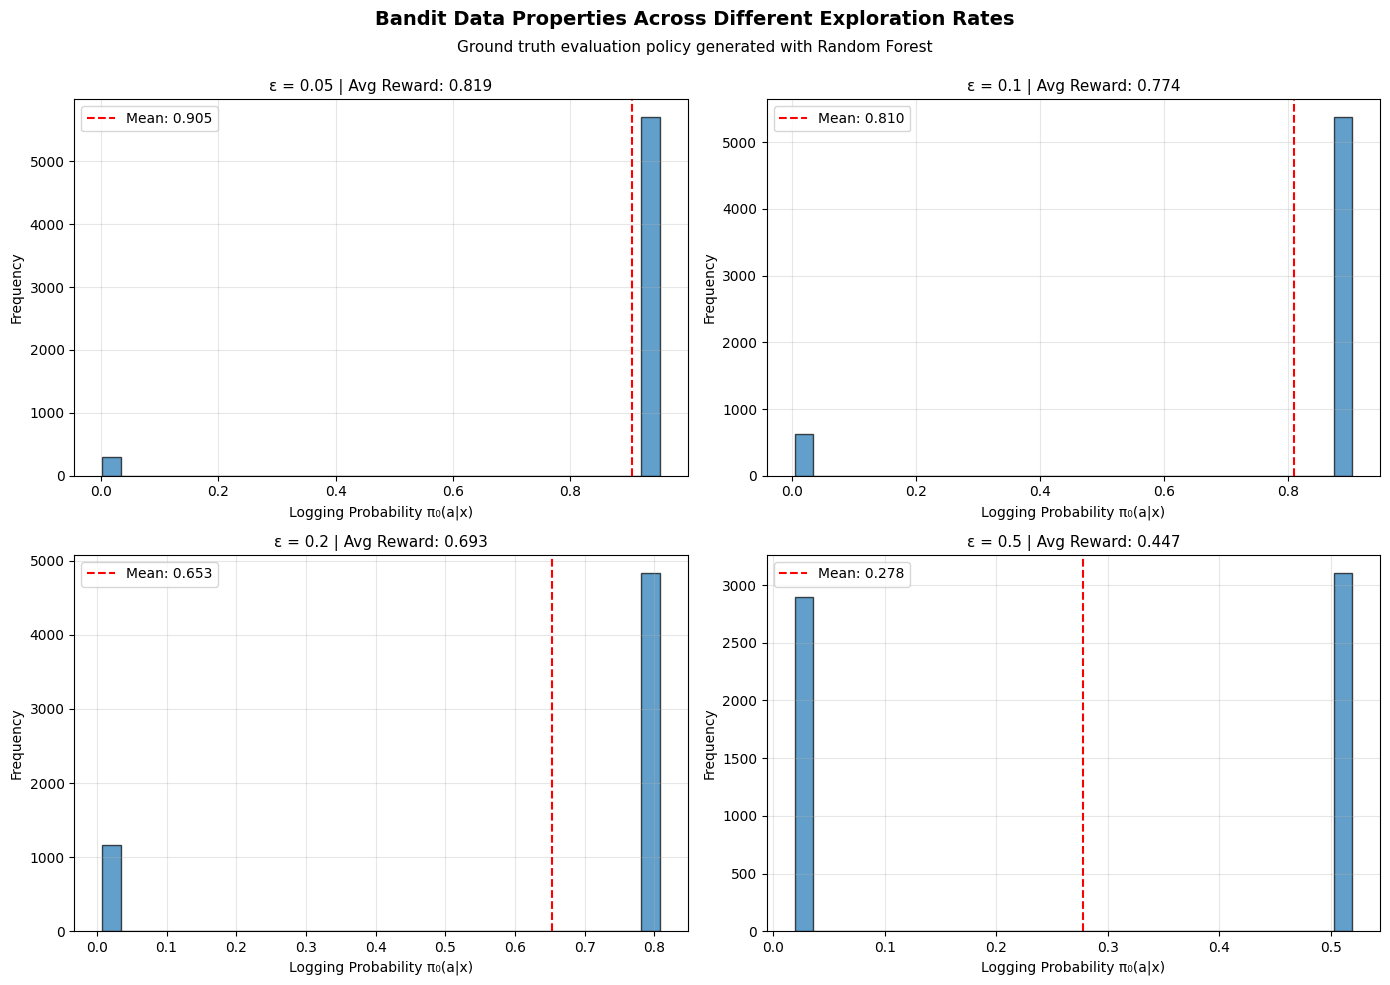

In [9]:
# STEP 7: Visualize the Bandit Data

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Bandit Data Properties Across Different Exploration Rates', 
             fontsize=14, fontweight='bold')

fig.text(0.5, 0.95,
         'Ground truth evaluation policy generated with Random Forest',
         ha='center', va='top', fontsize=11)

for idx, eps in enumerate(epsilon_values):
    ax = axes[idx // 2, idx % 2]
    data = bandit_datasets[eps]
    
    # Plot histogram of logging probabilities
    ax.hist(data['pi_0'], bins=30, edgecolor='black', alpha=0.7)
    ax.axvline(data['pi_0'].mean(), color='red', linestyle='--', 
               label=f"Mean: {data['pi_0'].mean():.3f}")
    ax.set_xlabel('Logging Probability π₀(a|x)', fontsize=10)
    ax.set_ylabel('Frequency', fontsize=10)
    ax.set_title(f"ε = {eps} | Avg Reward: {data['R'].mean():.3f}", fontsize=11)
    ax.legend()
    ax.grid(alpha=0.3)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()




In [10]:
# ESTIMATOR 1: Direct Method (DM)


def estimate_DM(bandit_data, evaluation_policy, reward_model):
    """
    Direct Method: Model the reward function
    
    V̂_DM(π) = (1/n) Σᵢ μ̂(πₑ(xᵢ), xᵢ)
    
    Args:
        bandit_data: dict with 'X', 'A', 'R', 'pi_0', 'y_true'
        evaluation_policy: trained classifier for πₑ
        reward_model: trained model that predicts E[R|A,X]
        
    Returns:
        V_hat: estimated policy value
    """
    X = bandit_data['X']
    
    # Get actions from evaluation policy
    pi_e_actions = evaluation_policy.predict(X)
    
    # Predict rewards for these actions
    # Get probability that each action is correct
    probs = reward_model.predict_proba(X)
    
    # For each sample, get the predicted reward for the action πₑ would take
    V_hat = 0
    for i in range(len(X)):
        action = pi_e_actions[i]
        predicted_reward = probs[i, action]  # P(correct | πₑ(x), x)
        V_hat += predicted_reward
    
    V_hat /= len(X)
    
    return V_hat



In [11]:
# ESTIMATOR 2: Inverse Propensity Score (IPS)


def estimate_IPS(bandit_data, evaluation_policy):
    """
    Inverse Propensity Score: Reweight observed data
    
    V̂_IPS(π) = (1/n) Σᵢ [𝟙(Aᵢ = πₑ(Xᵢ)) / π₀(Aᵢ | Xᵢ)] · Rᵢ
    
    Args:
        bandit_data: dict with 'X', 'A', 'R', 'pi_0', 'y_true'
        evaluation_policy: trained classifier for πₑ
        
    Returns:
        V_hat: estimated policy value
    """
    X = bandit_data['X']
    A = bandit_data['A']
    R = bandit_data['R']
    pi_0 = bandit_data['pi_0']
    
    # Get actions from evaluation policy
    pi_e_actions = evaluation_policy.predict(X)
    
    # Calculate IPS estimate
    V_hat = 0
    for i in range(len(X)):
        # Check if logged action matches evaluation policy action
        if A[i] == pi_e_actions[i]:
            # Importance weight * reward
            V_hat += R[i] / pi_0[i]
    
    V_hat /= len(X)
    
    return V_hat

In [12]:
# ESTIMATOR 3: Doubly Robust (DR)


def estimate_DR(bandit_data, evaluation_policy, reward_model):
    """
    Doubly Robust: Combine DM and IPS
    
    V̂_DR(π) = (1/n) Σᵢ [μ̂(πₑ(xᵢ), xᵢ) + 
                        [𝟙(Aᵢ = πₑ(Xᵢ)) / π₀(Aᵢ | Xᵢ)] · (Rᵢ - μ̂(Aᵢ, Xᵢ))]
    
    Args:
        bandit_data: dict with 'X', 'A', 'R', 'pi_0', 'y_true'
        evaluation_policy: trained classifier for πₑ
        reward_model: trained model that predicts E[R|A,X]
        
    Returns:
        V_hat: estimated policy value
    """
    X = bandit_data['X']
    A = bandit_data['A']
    R = bandit_data['R']
    pi_0 = bandit_data['pi_0']
    
    # Get actions from evaluation policy
    pi_e_actions = evaluation_policy.predict(X)
    
    # Get predicted rewards
    probs = reward_model.predict_proba(X)
    
    V_hat = 0
    for i in range(len(X)):
        action_e = pi_e_actions[i]
        action_logged = A[i]
        
        # Baseline: predicted reward for evaluation policy action
        baseline = probs[i, action_e]
        
        # Correction term: importance-weighted residual
        if action_logged == action_e:
            predicted_reward_logged = probs[i, action_logged]
            residual = R[i] - predicted_reward_logged
            correction = residual / pi_0[i]
        else:
            correction = 0
        
        V_hat += baseline + correction
    
    V_hat /= len(X)
    
    return V_hat


✓ Correct reward model trained (RandomForest)
  Train accuracy: 0.897
✓ Misspecified reward model trained (Logistic Regression)
  Train accuracy: 0.780

--- Epsilon = 0.05 ---
  Correct Model:
    DM:  0.5644
    IPS: 0.8600
    DR:  0.8593
  Misspecified Model:
    DM:  0.6306
    IPS: 0.8600 (same)
    DR:  0.8598

--- Epsilon = 0.1 ---
  Correct Model:
    DM:  0.5644
    IPS: 0.8556
    DR:  0.8605
  Misspecified Model:
    DM:  0.6306
    IPS: 0.8556 (same)
    DR:  0.8602

--- Epsilon = 0.2 ---
  Correct Model:
    DM:  0.5644
    IPS: 0.8561
    DR:  0.8582
  Misspecified Model:
    DM:  0.6306
    IPS: 0.8561 (same)
    DR:  0.8603

--- Epsilon = 0.5 ---
  Correct Model:
    DM:  0.5644
    IPS: 0.8570
    DR:  0.8638
  Misspecified Model:
    DM:  0.6306
    IPS: 0.8570 (same)
    DR:  0.8646

True Policy Value: 0.8603

Estimation Errors (|Estimate - True|):
 epsilon        model  DM_error  IPS_error  DR_error
    0.05      Correct  0.295886   0.000320  0.001002
    0.05 Missp

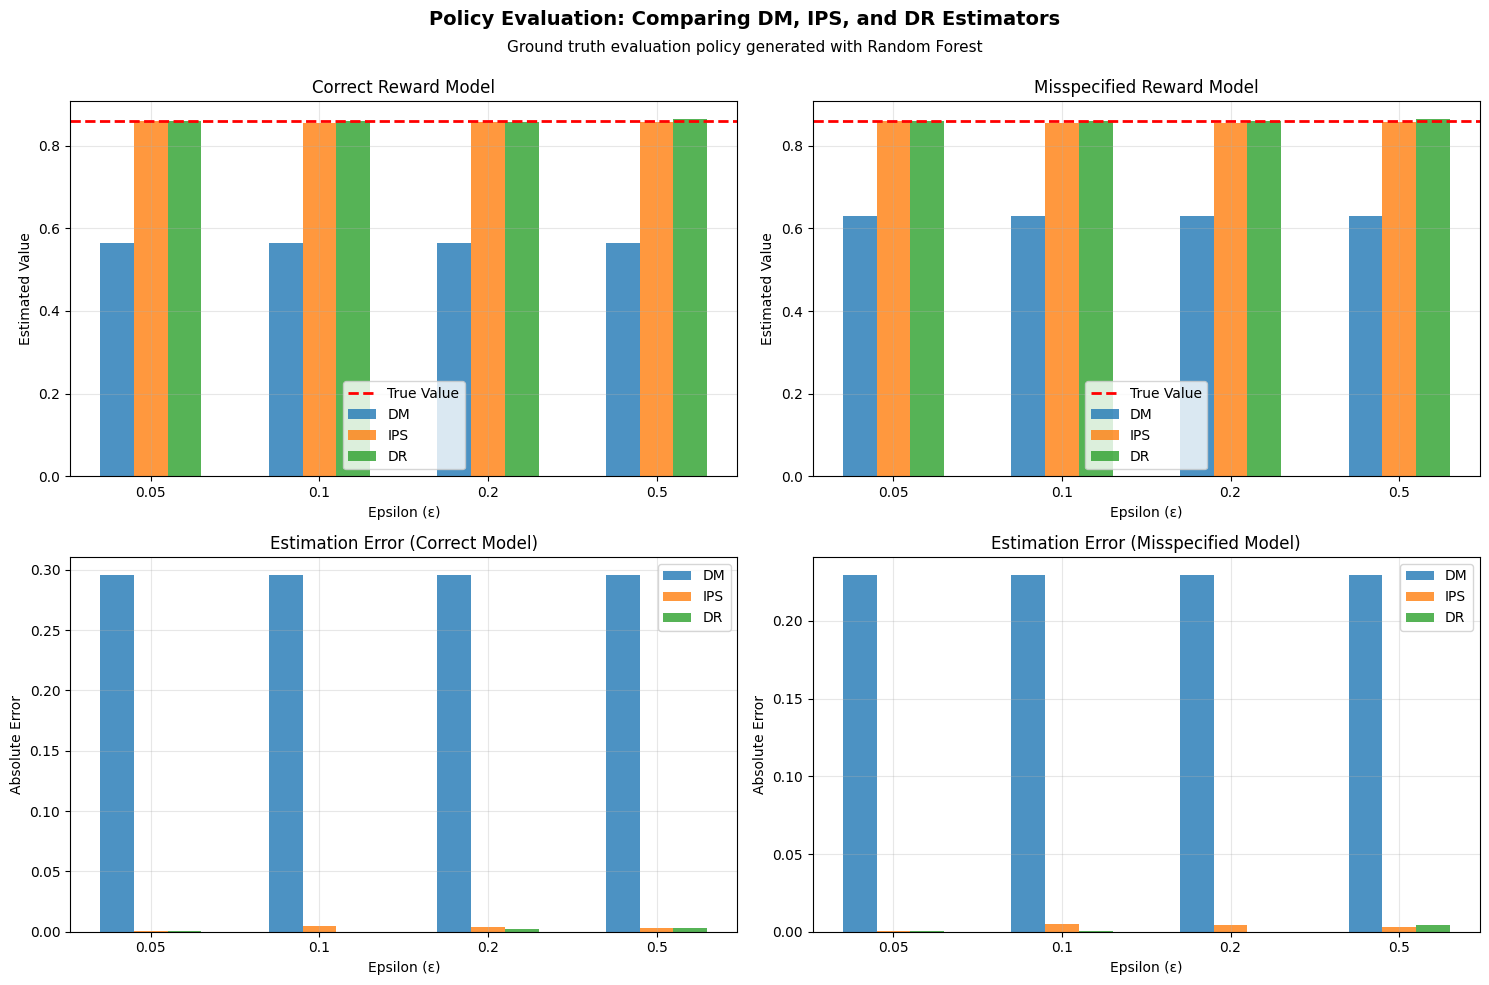


✓ Visualizations complete!

KEY FINDINGS

1. Impact of Overlap (varying ε):
   - As ε decreases (worse overlap), IPS error may increase
   - DR maintains stability even with poor overlap

2. Impact of Model Misspecification:
   - DM error increases when model is wrong
   - DR compensates using IPS correction term

3. Double Robustness Property:
   - DR performs well when EITHER model is correct
   - This is the 'insurance' property of DR


In [13]:
# Train Reward Models

# Correct reward model: Use same model class as evaluation policy
reward_model_correct = RandomForestClassifier(
    n_estimators=100, max_depth=10, random_state=42
)
reward_model_correct.fit(X_train, y_train)
print(f"✓ Correct reward model trained (RandomForest)")
print(f"  Train accuracy: {reward_model_correct.score(X_train, y_train):.3f}")

# Misspecified reward model: Use simpler model
reward_model_misspec = LogisticRegression(max_iter=1000, random_state=42)
reward_model_misspec.fit(X_train, y_train)
print(f"✓ Misspecified reward model trained (Logistic Regression)")
print(f"  Train accuracy: {reward_model_misspec.score(X_train, y_train):.3f}")

# ============================================================================
# Run All Estimators Across Different Scenarios


results = []

for eps in epsilon_values:
    bandit_data = bandit_datasets[eps]
    
    print(f"\n--- Epsilon = {eps} ---")
    
    # Scenario 1: Correct reward model
    V_DM_correct = estimate_DM(bandit_data, pi_e, reward_model_correct)
    V_IPS = estimate_IPS(bandit_data, pi_e)
    V_DR_correct = estimate_DR(bandit_data, pi_e, reward_model_correct)
    
    print(f"  Correct Model:")
    print(f"    DM:  {V_DM_correct:.4f}")
    print(f"    IPS: {V_IPS:.4f}")
    print(f"    DR:  {V_DR_correct:.4f}")
    
    results.append({
        'epsilon': eps,
        'model': 'Correct',
        'DM': V_DM_correct,
        'IPS': V_IPS,
        'DR': V_DR_correct,
        'True': V_true
    })
    
    # Scenario 2: Misspecified reward model
    V_DM_misspec = estimate_DM(bandit_data, pi_e, reward_model_misspec)
    V_DR_misspec = estimate_DR(bandit_data, pi_e, reward_model_misspec)
    
    print(f"  Misspecified Model:")
    print(f"    DM:  {V_DM_misspec:.4f}")
    print(f"    IPS: {V_IPS:.4f} (same)")
    print(f"    DR:  {V_DR_misspec:.4f}")
    
    results.append({
        'epsilon': eps,
        'model': 'Misspecified',
        'DM': V_DM_misspec,
        'IPS': V_IPS,
        'DR': V_DR_misspec,
        'True': V_true
    })

# Compute Errors


results_df = pd.DataFrame(results)

# Calculate absolute errors
results_df['DM_error'] = np.abs(results_df['DM'] - results_df['True'])
results_df['IPS_error'] = np.abs(results_df['IPS'] - results_df['True'])
results_df['DR_error'] = np.abs(results_df['DR'] - results_df['True'])

print(f"\nTrue Policy Value: {V_true:.4f}")
print("\nEstimation Errors (|Estimate - True|):")
print(results_df[['epsilon', 'model', 'DM_error', 'IPS_error', 'DR_error']].to_string(index=False))


# Visualize Results


fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Policy Evaluation: Comparing DM, IPS, and DR Estimators', 
             fontsize=14, fontweight='bold')

fig.text(0.5, 0.95,
         'Ground truth evaluation policy generated with Random Forest',
         ha='center', va='top', fontsize=11)

# Plot 1: Estimates vs True Value (Correct Model)
ax1 = axes[0, 0]
correct_model = results_df[results_df['model'] == 'Correct']
x = np.arange(len(epsilon_values))
width = 0.2

ax1.bar(x - width, correct_model['DM'], width, label='DM', alpha=0.8)
ax1.bar(x, correct_model['IPS'], width, label='IPS', alpha=0.8)
ax1.bar(x + width, correct_model['DR'], width, label='DR', alpha=0.8)
ax1.axhline(V_true, color='red', linestyle='--', linewidth=2, label='True Value')
ax1.set_xlabel('Epsilon (ε)')
ax1.set_ylabel('Estimated Value')
ax1.set_title('Correct Reward Model')
ax1.set_xticks(x)
ax1.set_xticklabels(epsilon_values)
ax1.legend()
ax1.grid(alpha=0.3)

# Plot 2: Estimates vs True Value (Misspecified Model)
ax2 = axes[0, 1]
misspec_model = results_df[results_df['model'] == 'Misspecified']

ax2.bar(x - width, misspec_model['DM'], width, label='DM', alpha=0.8)
ax2.bar(x, misspec_model['IPS'], width, label='IPS', alpha=0.8)
ax2.bar(x + width, misspec_model['DR'], width, label='DR', alpha=0.8)
ax2.axhline(V_true, color='red', linestyle='--', linewidth=2, label='True Value')
ax2.set_xlabel('Epsilon (ε)')
ax2.set_ylabel('Estimated Value')
ax2.set_title('Misspecified Reward Model')
ax2.set_xticks(x)
ax2.set_xticklabels(epsilon_values)
ax2.legend()
ax2.grid(alpha=0.3)

# Plot 3: Absolute Errors (Correct Model)
ax3 = axes[1, 0]
ax3.bar(x - width, correct_model['DM_error'], width, label='DM', alpha=0.8)
ax3.bar(x, correct_model['IPS_error'], width, label='IPS', alpha=0.8)
ax3.bar(x + width, correct_model['DR_error'], width, label='DR', alpha=0.8)
ax3.set_xlabel('Epsilon (ε)')
ax3.set_ylabel('Absolute Error')
ax3.set_title('Estimation Error (Correct Model)')
ax3.set_xticks(x)
ax3.set_xticklabels(epsilon_values)
ax3.legend()
ax3.grid(alpha=0.3)

# Plot 4: Absolute Errors (Misspecified Model)
ax4 = axes[1, 1]
ax4.bar(x - width, misspec_model['DM_error'], width, label='DM', alpha=0.8)
ax4.bar(x, misspec_model['IPS_error'], width, label='IPS', alpha=0.8)
ax4.bar(x + width, misspec_model['DR_error'], width, label='DR', alpha=0.8)
ax4.set_xlabel('Epsilon (ε)')
ax4.set_ylabel('Absolute Error')
ax4.set_title('Estimation Error (Misspecified Model)')
ax4.set_xticks(x)
ax4.set_xticklabels(epsilon_values)
ax4.legend()
ax4.grid(alpha=0.3)


plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

print("\n✓ Visualizations complete!")

# Key Findings

print("\n" + "=" * 70)
print("KEY FINDINGS")
print("=" * 70)

print("\n1. Impact of Overlap (varying ε):")
print("   - As ε decreases (worse overlap), IPS error may increase")
print("   - DR maintains stability even with poor overlap")

print("\n2. Impact of Model Misspecification:")
print("   - DM error increases when model is wrong")
print("   - DR compensates using IPS correction term")

print("\n3. Double Robustness Property:")
print("   - DR performs well when EITHER model is correct")
print("   - This is the 'insurance' property of DR")




Now, let's evaluate bias, variance and rmse for the different methods x the mis/correctly-specified models.

In [14]:
# # Vectorized speedup for DM
def estimate_DM_vectorized(bandit_data, evaluation_policy, reward_model):
    X = bandit_data['X']
    pi_e_actions = evaluation_policy.predict(X)
    probs = reward_model.predict_proba(X)
    return probs[np.arange(len(X)), pi_e_actions].mean()

In [15]:
try:
    reward_model_correct
except NameError:
    reward_model_correct.fit(X_train, y_train)
    reward_model_misspec.fit(X_train, y_train)

def run_ope_mc(X_ctx, y_true,evaluation_policy, epsilon_values,n_runs=50):
    """
    For each epsilon, repeat bandit logging n_runs times and compute
    empirical bias, variance, RMSE for DM / IPS / DR.
    Returns a tidy DataFrame to be used for visualization.
    """
    rng = np.random.RandomState(2025)
    results = []

    for eps in epsilon_values:
        for run in range(n_runs):

            pi0 = create_epsilon_greedy_policy(evaluation_policy, epsilon=eps, n_classes=n_classes)
            bandit = generate_bandit_data(X_ctx, y_true, pi0, policy_name=f"π₀(ε={eps})")

            dm_corr = estimate_DM_vectorized(bandit, evaluation_policy, reward_model_correct)
            dr_corr = estimate_DR(bandit, evaluation_policy, reward_model_correct)

            dm_mis  = estimate_DM_vectorized(bandit, evaluation_policy, reward_model_misspec)
            dr_mis  = estimate_DR(bandit, evaluation_policy, reward_model_misspec)

            ips = estimate_IPS(bandit, evaluation_policy)

            results.extend([
                {"epsilon": eps, "method": "DM",   "spec": "Correct",      "estimate": dm_corr, "V_true": V_true},
                {"epsilon": eps, "method": "DR",   "spec": "Correct",      "estimate": dr_corr, "V_true": V_true},
                {"epsilon": eps, "method": "DM",   "spec": "Misspecified", "estimate": dm_mis,  "V_true": V_true},
                {"epsilon": eps, "method": "DR",   "spec": "Misspecified", "estimate": dr_mis,  "V_true": V_true},
                {"epsilon": eps, "method": "IPS",  "spec": "N/A",          "estimate": ips,     "V_true": V_true}
            ])

    df = pd.DataFrame(results)

    def summarize(group):
        est = group["estimate"].to_numpy()
        mu = est.mean()
        bias = mu - group["V_true"].iloc[0]
        var  = est.var(ddof=1)
        rmse = np.sqrt(bias**2 + var)
        return pd.Series({"mean_est": mu, "bias": bias, "variance": var, "rmse": rmse, "n": len(est)})

    summary = (
        df.groupby(["epsilon", "method", "spec"], as_index=False)
          .apply(summarize)
          .reset_index(drop=True)
          .sort_values(["epsilon", "method", "spec"])
    )
    return df, summary

mc_raw, mc_summary = run_ope_mc(
    X_ctx=X_test, y_true=y_test,
    evaluation_policy=pi_e,
    epsilon_values=epsilon_values,
    n_runs=50     # Tweak this number for speed / precision
)

print("Empirical bias/variance/RMSE across ε (mean over Monte Carlo runs):")
display_cols = ["epsilon", "method", "spec", "mean_est", "bias", "variance", "rmse", "n"]
mc_summary[display_cols]


π₀(ε=0.05) Bandit Data Generated:
  Samples: 6000
  Average reward: 0.820
  Min π₀(a|x): 0.0019
  Max π₀(a|x): 0.9519

π₀(ε=0.05) Bandit Data Generated:
  Samples: 6000
  Average reward: 0.817
  Min π₀(a|x): 0.0019
  Max π₀(a|x): 0.9519

π₀(ε=0.05) Bandit Data Generated:
  Samples: 6000
  Average reward: 0.824
  Min π₀(a|x): 0.0019
  Max π₀(a|x): 0.9519

π₀(ε=0.05) Bandit Data Generated:
  Samples: 6000
  Average reward: 0.818
  Min π₀(a|x): 0.0019
  Max π₀(a|x): 0.9519

π₀(ε=0.05) Bandit Data Generated:
  Samples: 6000
  Average reward: 0.817
  Min π₀(a|x): 0.0019
  Max π₀(a|x): 0.9519

π₀(ε=0.05) Bandit Data Generated:
  Samples: 6000
  Average reward: 0.823
  Min π₀(a|x): 0.0019
  Max π₀(a|x): 0.9519

π₀(ε=0.05) Bandit Data Generated:
  Samples: 6000
  Average reward: 0.819
  Min π₀(a|x): 0.0019
  Max π₀(a|x): 0.9519

π₀(ε=0.05) Bandit Data Generated:
  Samples: 6000
  Average reward: 0.820
  Min π₀(a|x): 0.0019
  Max π₀(a|x): 0.9519

π₀(ε=0.05) Bandit Data Generated:
  Samples: 60

/var/folders/bp/6wg7v5x11rv865pndqyhwj8c0000gn/T/ipykernel_80102/1330728568.py:50: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(summarize)


,epsilon,method,spec,mean_est,bias,variance,rmse,n
0,0.05,DM,Correct,0.564447,-0.295886,1.257750e-32,0.295886,50.0
1,0.05,DM,Misspecified,0.630634,-0.229700,0.000000e+00,0.229700,50.0
2,0.05,DR,Correct,0.860537,0.000204,1.371442e-06,0.001189,50.0
3,0.05,DR,Misspecified,0.860508,0.000174,9.479378e-07,0.000989,50.0
4,0.05,IPS,N/A,0.860560,0.000226,7.250270e-06,0.002702,50.0
5,0.10,DM,Correct,0.564447,-0.295886,1.257750e-32,0.295886,50.0
6,0.10,DM,Misspecified,0.630634,-0.229700,0.000000e+00,0.229700,50.0
7,0.10,DR,Correct,0.860162,-0.000171,4.474682e-06,0.002122,50.0
8,0.10,DR,Misspecified,0.860248,-0.000086,3.378853e-06,0.001840,50.0
9,0.10,IPS,N/A,0.860025,-0.000309,1.569309e-05,0.003973,50.0


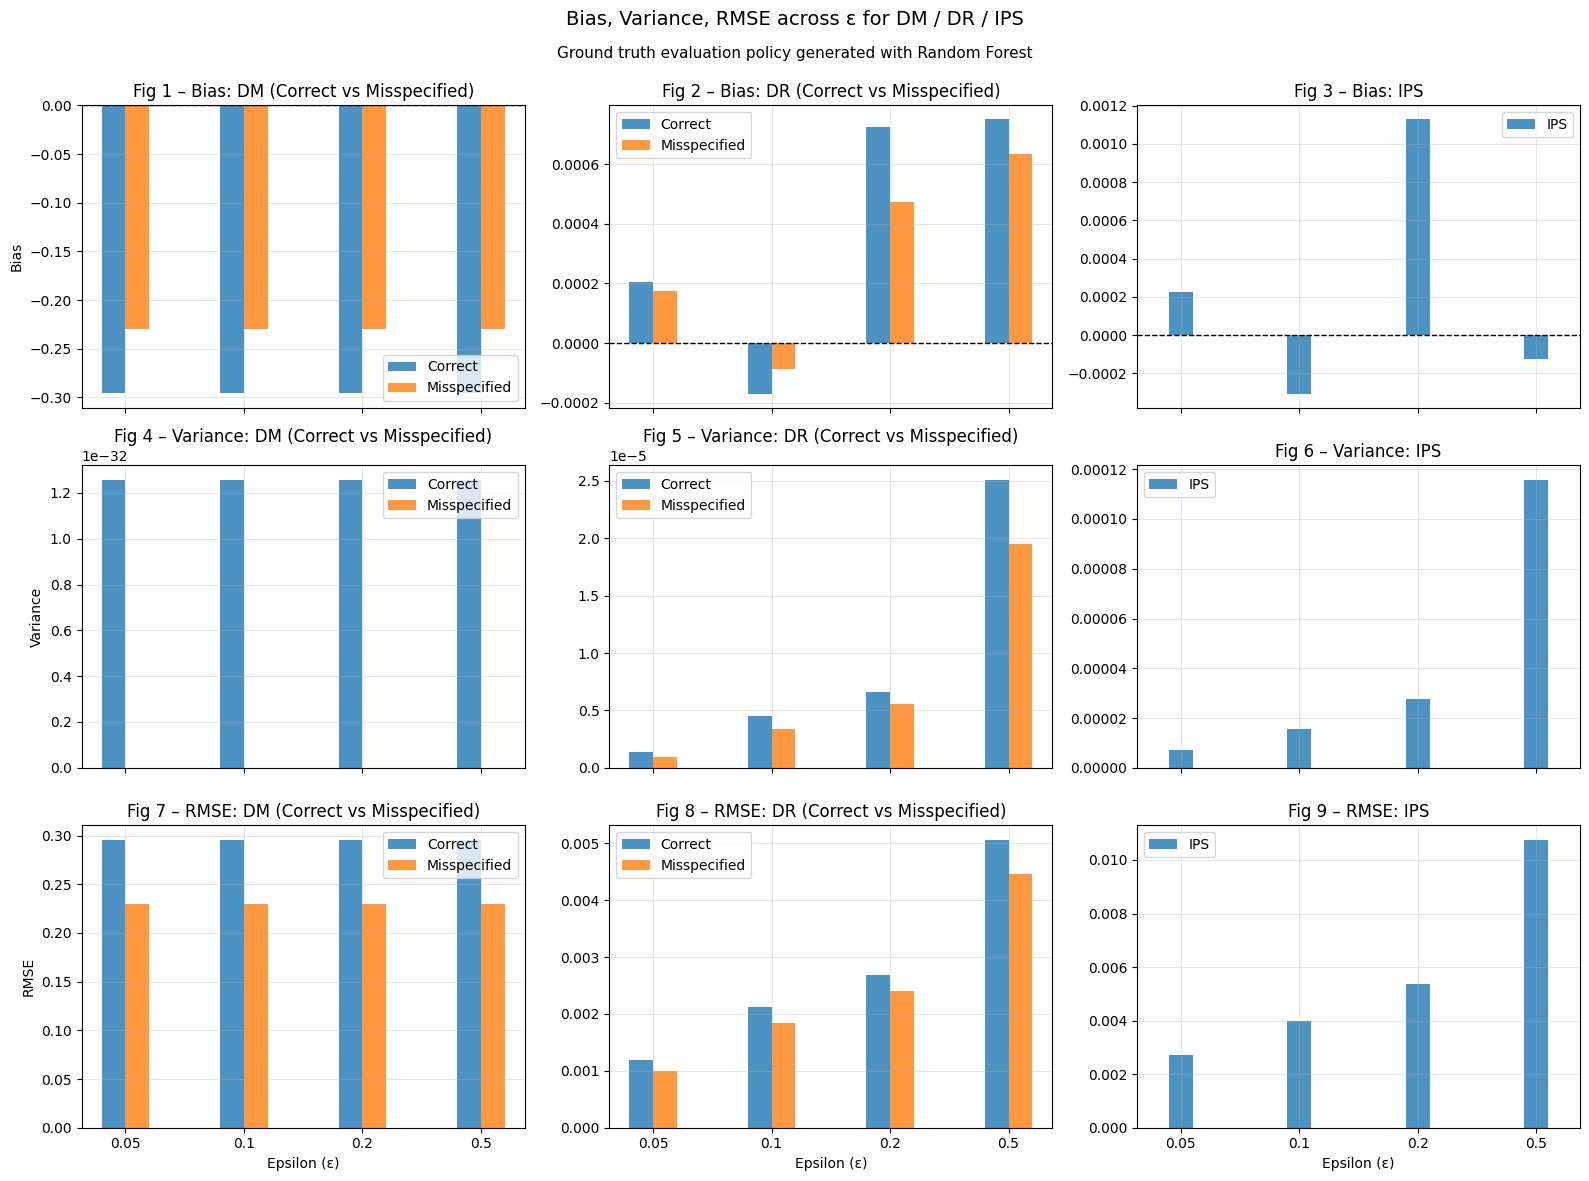


KEY FINDINGS

1. Bias:
   - Large bias for both correct and misspecified model when using DM method
   - Low bias for both correct and misspecified method when using DR method (i.e., close to 0)

2. Variance:
   - Low variance for DM method with misspecified model; larger but stable variance for correct model when using DM method
   - Low variance that increases with epsilon values for DR method with both correct and misspecified model
   - Initial variance for IPS method, which increases drastically with epsilon values


In [16]:
# Helper to pull values aligned to epsilon_values
def vals(mc_summary, method, metric, spec=None):
    out = []
    for eps in epsilon_values:
        if spec is None:
            sub = mc_summary[(mc_summary['method'] == method) & (mc_summary['epsilon'] == eps)]
        else:
            sub = mc_summary[(mc_summary['method'] == method) & (mc_summary['spec'] == spec) & (mc_summary['epsilon'] == eps)]
        if sub.empty:
            out.append(np.nan)
        else:
            out.append(sub.iloc[0][metric])
    return np.array(out, dtype=float)

x = np.arange(len(epsilon_values))
width = 0.2  

fig, axes = plt.subplots(3, 3, figsize=(16, 12), sharex=True)
plt.suptitle("Bias, Variance, RMSE across ε for DM / DR / IPS", fontsize=14, y=0.98)

fig.text(0.5, 0.95,
         'Ground truth evaluation policy generated with Random Forest',
         ha='center', va='top', fontsize=11)

# Plot 1: Bias: DM (Correct vs Misspecified)
ax1 = axes[0, 0]
dm_bias_corr = vals(mc_summary, 'DM', 'bias', spec='Correct')
dm_bias_mis  = vals(mc_summary, 'DM', 'bias', spec='Misspecified')
ax1.bar(x - width/2, dm_bias_corr, width, label='Correct', alpha=0.8)
ax1.bar(x + width/2, dm_bias_mis,  width, label='Misspecified', alpha=0.8)
ax1.axhline(0, color='black', linestyle='--', linewidth=1)
ax1.set_title('Fig 1 – Bias: DM (Correct vs Misspecified)')
ax1.set_ylabel('Bias')
ax1.set_xticks(x)
ax1.set_xticklabels(epsilon_values)
ax1.legend()
ax1.grid(alpha=0.3)

# Plot 2: Bias: DR (Correct vs Misspecified)
ax2 = axes[0, 1]
dr_bias_corr = vals(mc_summary, 'DR', 'bias', spec='Correct')
dr_bias_mis  = vals(mc_summary, 'DR', 'bias', spec='Misspecified')
ax2.bar(x - width/2, dr_bias_corr, width, label='Correct', alpha=0.8)
ax2.bar(x + width/2, dr_bias_mis,  width, label='Misspecified', alpha=0.8)
ax2.axhline(0, color='black', linestyle='--', linewidth=1)
ax2.set_title('Fig 2 – Bias: DR (Correct vs Misspecified)')
ax2.set_xticks(x)
ax2.set_xticklabels(epsilon_values)
ax2.legend()
ax2.grid(alpha=0.3)

# Plot 3: Bias: IPS
ax3 = axes[0, 2]
ips_bias = vals(mc_summary, 'IPS', 'bias', spec=None)
ax3.bar(x, ips_bias, width, label='IPS', alpha=0.8)
ax3.axhline(0, color='black', linestyle='--', linewidth=1)
ax3.set_title('Fig 3 – Bias: IPS')
ax3.set_xticks(x)
ax3.set_xticklabels(epsilon_values)
ax3.legend()
ax3.grid(alpha=0.3)

# Plot 4: Variance: DM (Correct vs Misspecified)
ax4 = axes[1, 0]
dm_var_corr = vals(mc_summary, 'DM', 'variance', spec='Correct')
dm_var_mis  = vals(mc_summary, 'DM', 'variance', spec='Misspecified')
ax4.bar(x - width/2, dm_var_corr, width, label='Correct', alpha=0.8)
ax4.bar(x + width/2, dm_var_mis,  width, label='Misspecified', alpha=0.8)
ax4.set_title('Fig 4 – Variance: DM (Correct vs Misspecified)')
ax4.set_ylabel('Variance')
ax4.set_xticks(x)
ax4.set_xticklabels(epsilon_values)
ax4.legend()
ax4.grid(alpha=0.3)

# Plot 5: Variance: DR (Correct vs Misspecified)
ax5 = axes[1, 1]
dr_var_corr = vals(mc_summary, 'DR', 'variance', spec='Correct')
dr_var_mis  = vals(mc_summary, 'DR', 'variance', spec='Misspecified')
ax5.bar(x - width/2, dr_var_corr, width, label='Correct', alpha=0.8)
ax5.bar(x + width/2, dr_var_mis,  width, label='Misspecified', alpha=0.8)
ax5.set_title('Fig 5 – Variance: DR (Correct vs Misspecified)')
ax5.set_xticks(x)
ax5.set_xticklabels(epsilon_values)
ax5.legend()
ax5.grid(alpha=0.3)

# Plot 6: Variance: IPS
ax6 = axes[1, 2]
ips_var = vals(mc_summary, 'IPS', 'variance', spec=None)
ax6.bar(x, ips_var, width, label='IPS', alpha=0.8)
ax6.set_title('Fig 6 – Variance: IPS')
ax6.set_xticks(x)
ax6.set_xticklabels(epsilon_values)
ax6.legend()
ax6.grid(alpha=0.3)

# Plot 7: RMSE: DM (Correct vs Misspecified)
ax7 = axes[2, 0]
dm_rmse_corr = vals(mc_summary, 'DM', 'rmse', spec='Correct')
dm_rmse_mis  = vals(mc_summary, 'DM', 'rmse', spec='Misspecified')
ax7.bar(x - width/2, dm_rmse_corr, width, label='Correct', alpha=0.8)
ax7.bar(x + width/2, dm_rmse_mis,  width, label='Misspecified', alpha=0.8)
ax7.set_title('Fig 7 – RMSE: DM (Correct vs Misspecified)')
ax7.set_ylabel('RMSE')
ax7.set_xlabel('Epsilon (ε)')
ax7.set_xticks(x)
ax7.set_xticklabels(epsilon_values)
ax7.legend()
ax7.grid(alpha=0.3)

# Plot 8: RMSE: DR (Correct vs Misspecified)
ax8 = axes[2, 1]
dr_rmse_corr = vals(mc_summary, 'DR', 'rmse', spec='Correct')
dr_rmse_mis  = vals(mc_summary, 'DR', 'rmse', spec='Misspecified')
ax8.bar(x - width/2, dr_rmse_corr, width, label='Correct', alpha=0.8)
ax8.bar(x + width/2, dr_rmse_mis,  width, label='Misspecified', alpha=0.8)
ax8.set_title('Fig 8 – RMSE: DR (Correct vs Misspecified)')
ax8.set_xlabel('Epsilon (ε)')
ax8.set_xticks(x)
ax8.set_xticklabels(epsilon_values)
ax8.legend()
ax8.grid(alpha=0.3)

# Plot 9: RMSE: IPS
ax9 = axes[2, 2]
ips_rmse = vals(mc_summary, 'IPS', 'rmse', spec=None)
ax9.bar(x, ips_rmse, width, label='IPS', alpha=0.8)
ax9.set_title('Fig 9 – RMSE: IPS')
ax9.set_xlabel('Epsilon (ε)')
ax9.set_xticks(x)
ax9.set_xticklabels(epsilon_values)
ax9.legend()
ax9.grid(alpha=0.3)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# Key Findings

print("\n" + "=" * 70)
print("KEY FINDINGS")
print("=" * 70)

print("\n1. Bias:")
print("   - Large bias for both correct and misspecified model when using DM method")
print("   - Low bias for both correct and misspecified method when using DR method (i.e., close to 0)")

print("\n2. Variance:")
print("   - Low variance for DM method with misspecified model; larger but stable variance for correct model when using DM method")
print("   - Low variance that increases with epsilon values for DR method with both correct and misspecified model")
print("   - Initial variance for IPS method, which increases drastically with epsilon values")


## Things to try on your own
- **Different Datasets**
    - UCI has many different datasets for classifications. In Dudik et al., they used many more with varying n.
    - Change the test/train split and see how this affects the result
- **Methodologically**
    - Change the epsilon values further.
    - Change the evaluation method ($\pi_e$) (e.g., from RandomForest to LogisticRegression) and explore how it affects, classification error, bias, variance and rmse. 

## Source:
- Dudik,M., Langford, J., & Li, L. (2011). "Doubly Robust Policy Evaluation and Learning." In *International Conference on Machine Learning,* 1049-1104. PMLR